In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\91701\Desktop\Projects\Python_Data_Analytics\Uber End to End Data Analytics Project\UberDataset.xlsx'
data = pd.read_excel(file_path)

In [227]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [228]:
data.shape

(1156, 7)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [230]:
data['PURPOSE'].fillna('NaN', inplace=True)

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [232]:
data.dropna(inplace=True)

In [233]:
data.shape

(1155, 7)

In [234]:
# Converting START_DATE and END_DATE from object to datetime datatype
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [236]:
data['HOUR'] = pd.to_datetime(data['START_DATE'], errors='coerce').dt.hour
data['DAY'] = pd.to_datetime(data['START_DATE'], errors='coerce').dt.day_name()
data['MONTH'] = pd.to_datetime(data['START_DATE'], errors='coerce').dt.month_name()

In [237]:
# Creating a new column 'DAY-NIGHT' based on the hour of the day from 0 to 10 as Morning, 11 to 15 Afternoon, 16 to 18 Evening and 19 to 24 Night using bins we seperate the HOUR of the day and using labels we can assign a name to each bin.
data['DAY-NIGHT'] = pd.cut(x=data['HOUR'], bins=[0, 10, 15, 19, 24], labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

In [238]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,Monday,February,Morning
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Monday,February,Night
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Sunday,May,Evening
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,June,Afternoon


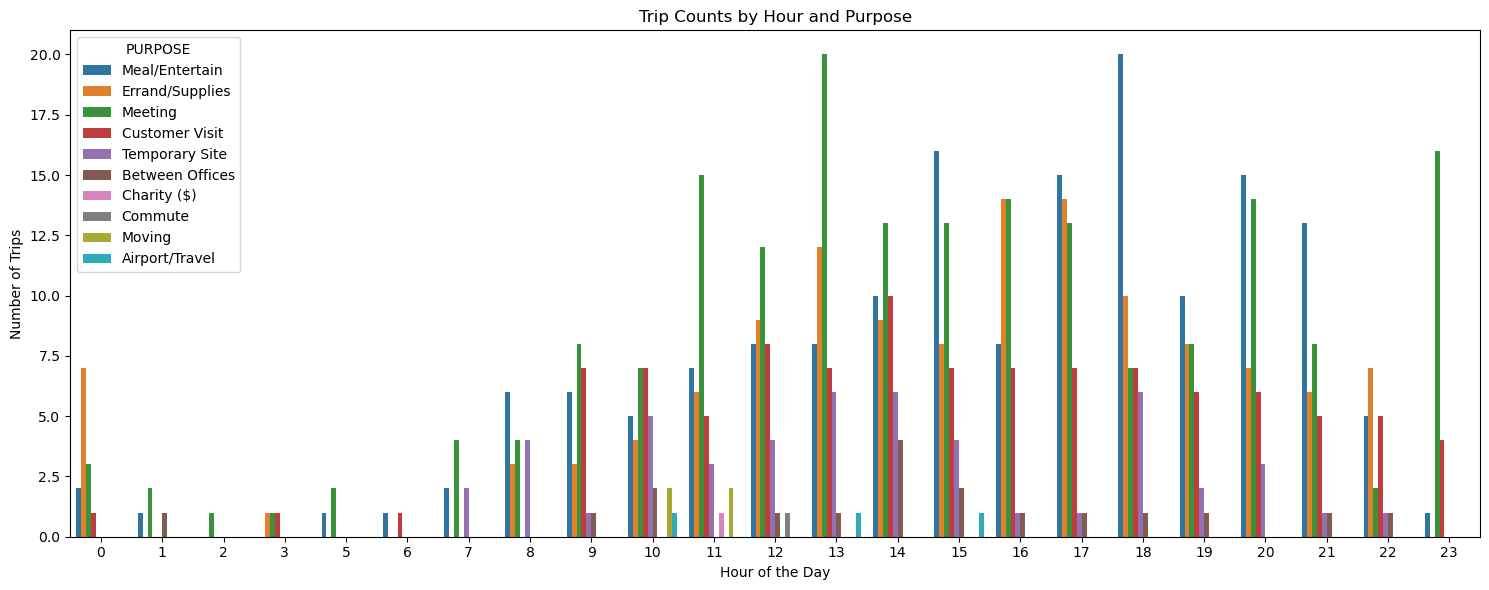

In [239]:
# Strip whitespace and convert 'NaN'-like strings to actual NaN
data['HOUR'] = data['HOUR']
data['PURPOSE'] = data['PURPOSE'].replace(['NaN', 'nan', '', ' '], np.nan)

# Now filter only valid rows
filtered_data = data[data['HOUR'].notna() & data['PURPOSE'].notna()]

# Plot
plt.figure(figsize=(15, 6))
sns.countplot(data=filtered_data, x='HOUR', hue='PURPOSE')
plt.title('Trip Counts by Hour and Purpose')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

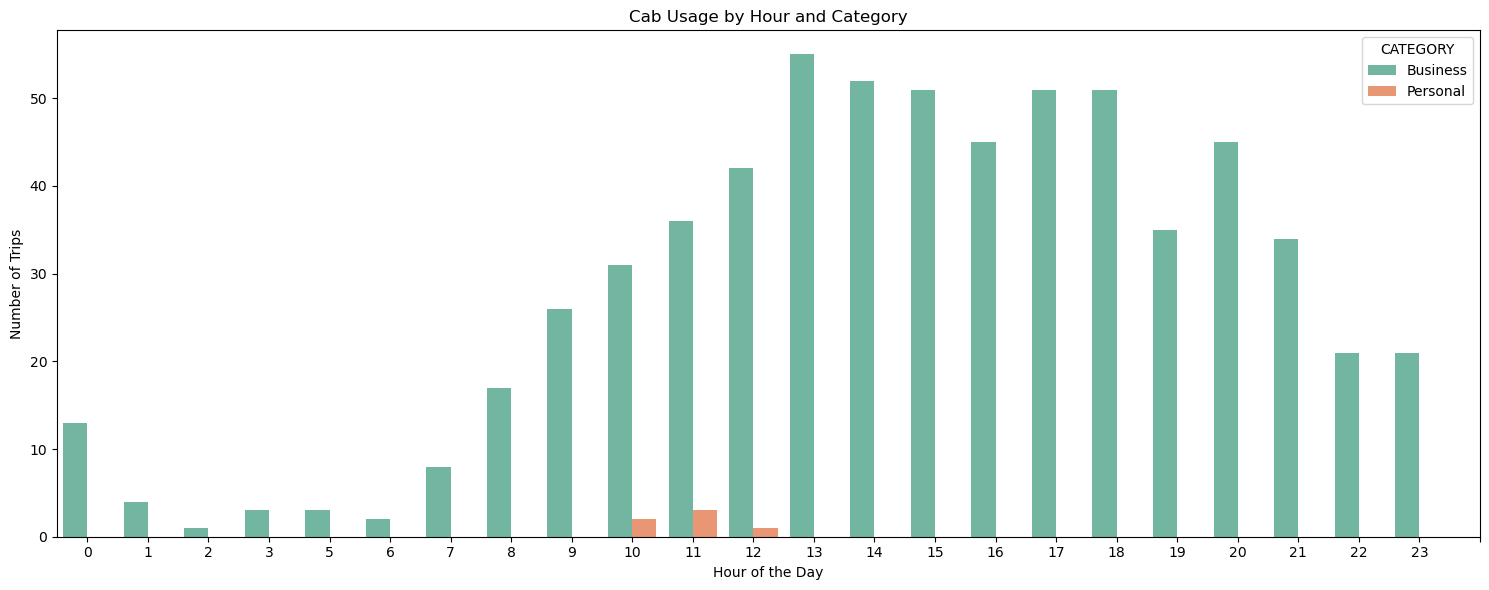

In [240]:
# 1. Clean data
data['HOUR'] = pd.to_numeric(data['HOUR'], errors='coerce')
data['CATEGORY'] = data['CATEGORY']

# 2. Group by HOUR and CATEGORY to count trips
category_grouped = filtered_data.groupby(['HOUR', 'CATEGORY']).size().reset_index(name='COUNT')

# 3. Plot using seaborn barplot
plt.figure(figsize=(15, 6))
sns.barplot(data=category_grouped, x='HOUR', y='COUNT', hue='CATEGORY', palette='Set2')

plt.title('Cab Usage by Hour and Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(0, 24))  # Optional: show all 24 hours
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

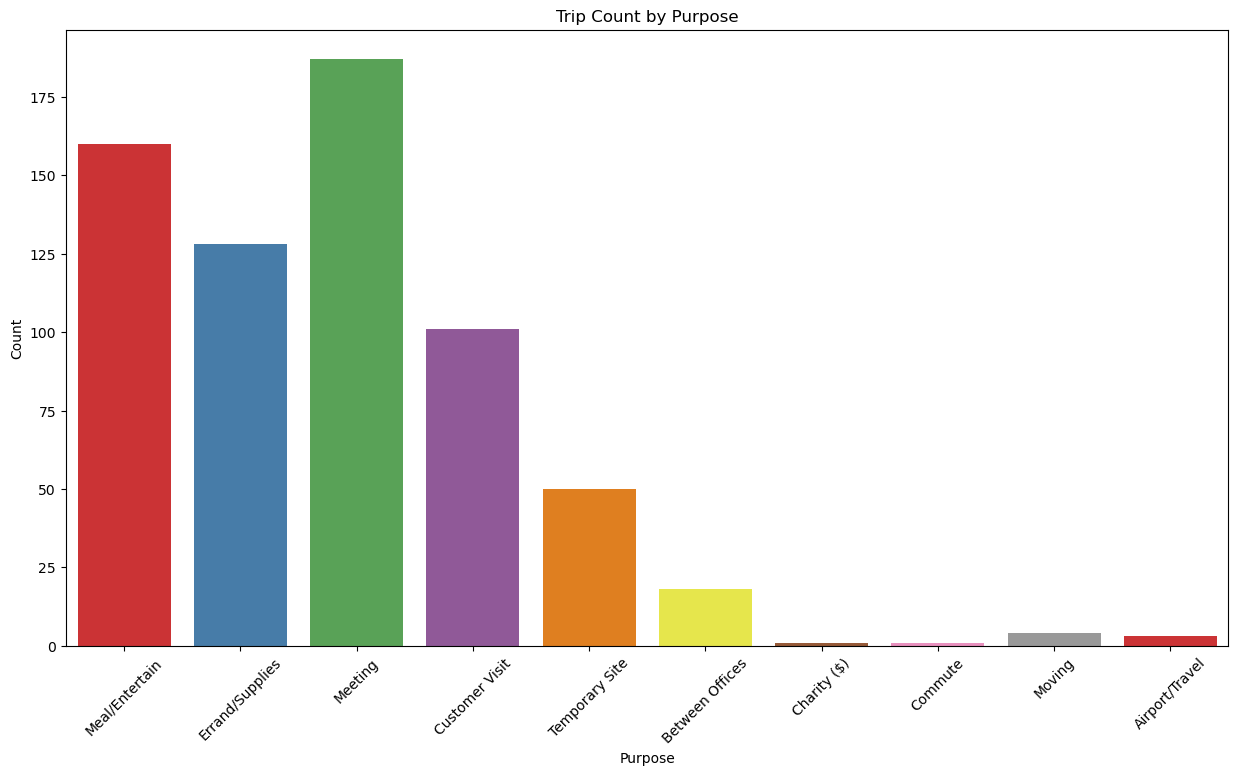

In [241]:
plt.figure(figsize=(15, 8))
sns.countplot(x='PURPOSE', data=data, palette='Set1')
plt.title('Trip Count by Purpose')
plt.xticks(rotation=45)
plt.xlabel('Purpose')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

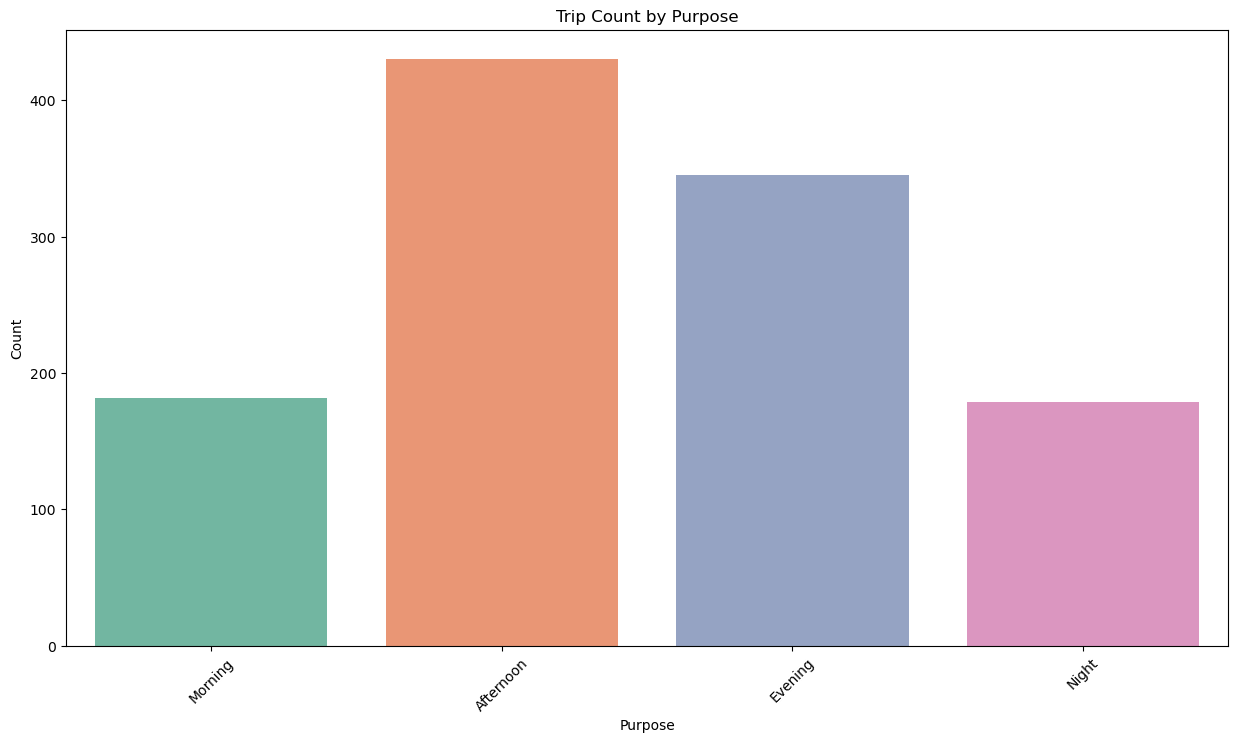

In [242]:
plt.figure(figsize=(15, 8))
sns.countplot(x='DAY-NIGHT', data=data, palette='Set2')
plt.title('Trip Count by Purpose')
plt.xticks(rotation=45)
plt.xlabel('Purpose')
plt.ylabel('Count')

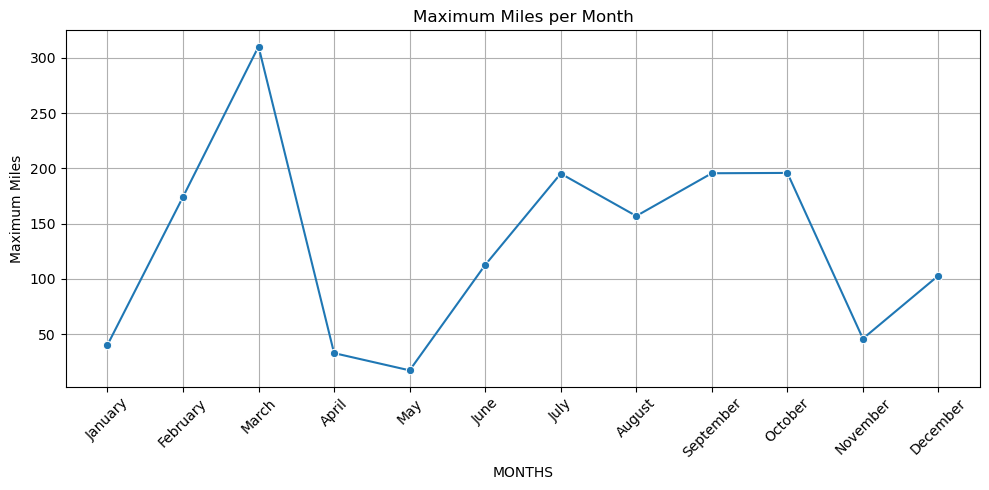

In [243]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df = data.groupby('MONTH')['MILES'].max().reindex(month_order).reset_index()
df.columns = ['MONTHS', 'VALUE COUNT']

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='MONTHS', y='VALUE COUNT', marker='o')
plt.title("Maximum Miles per Month")
plt.xlabel("MONTHS")
plt.ylabel("Maximum Miles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

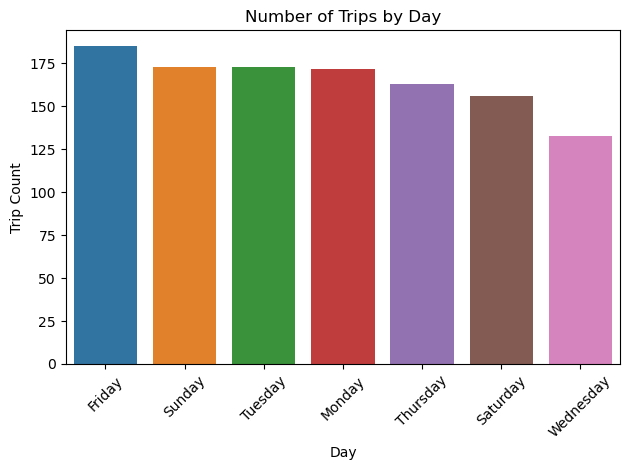

In [244]:
day_label = data['DAY'].value_counts()

sns.barplot(x=day_label.index, y=day_label.values)
plt.xlabel('Day')
plt.ylabel('Trip Count')
plt.title('Number of Trips by Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

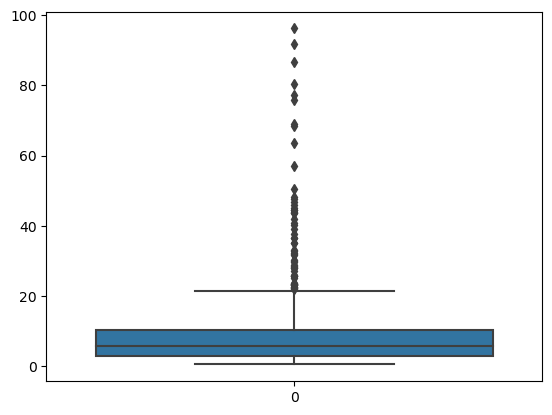

In [254]:
sns.boxplot(data[data['MILES']<100]['MILES'])

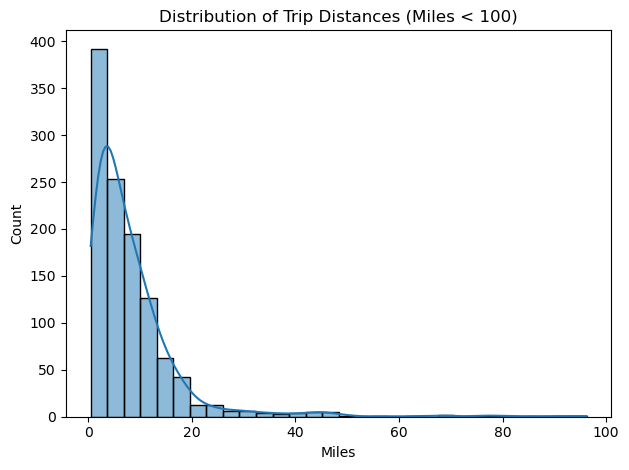

In [265]:
sns.histplot(data[data['MILES'] < 100]['MILES'], kde=True, bins=30)
plt.xlabel("Miles")
plt.title("Distribution of Trip Distances (Miles < 100)")
plt.tight_layout()
plt.show()

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data.dropna(subset=['MILES'], inplace=True)
data['HOUR'] = data['START_DATE'].dt.hour
X = data[['HOUR']]  # You can expand with 'PURPOSE' after encoding
y = data['MILES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, predictions, squared=False))

RMSE: 17.974105276546506


In [267]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data.dropna(subset=['CATEGORY', 'PURPOSE'], inplace=True)
le = LabelEncoder()
data['PURPOSE_ENC'] = le.fit_transform(data['PURPOSE'])
data['HOUR'] = data['START_DATE'].dt.hour

X = data[['HOUR', 'MILES', 'PURPOSE_ENC']]
y = le.fit_transform(data['CATEGORY'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 1.0


c:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<Axes: xlabel='MILES', ylabel='HOUR'>

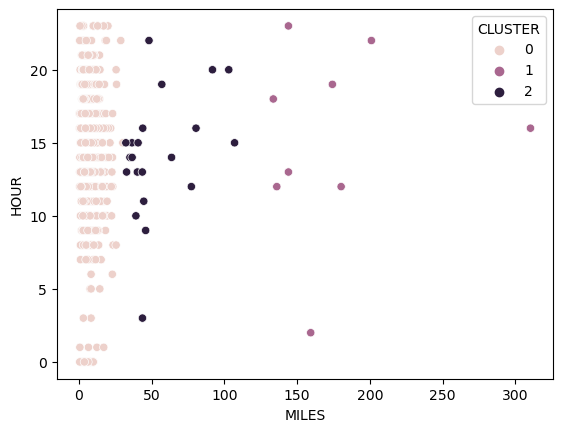

In [268]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data[['MILES']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3).fit(X_scaled)
data['CLUSTER'] = kmeans.labels_
sns.scatterplot(data=data, x='MILES', y='HOUR', hue='CLUSTER')

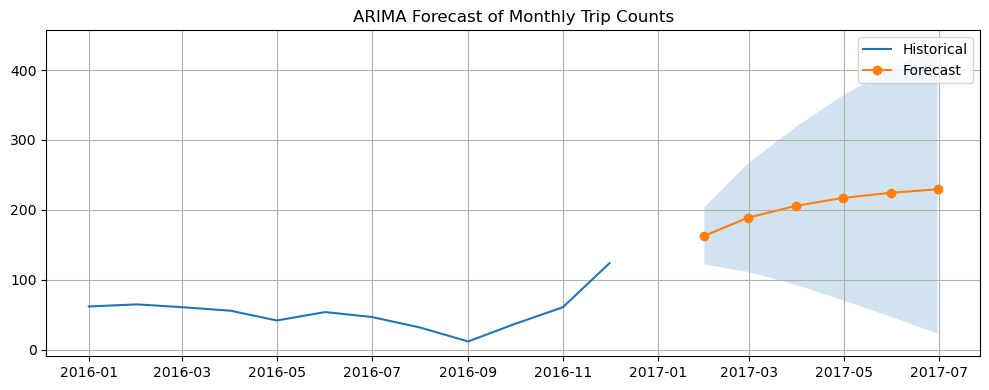

In [270]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the time series data
ts = data.groupby(data['START_DATE'].dt.to_period('M')).size()
ts.index = ts.index.to_timestamp()

# Fit an ARIMA model (simple example: ARIMA(1,1,1))
model = ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# Forecast next 6 months
forecast = results.get_forecast(steps=6)
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')

# Plot
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Historical')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast.conf_int()['lower y'], forecast.conf_int()['upper y'], alpha=0.2)
plt.title("ARIMA Forecast of Monthly Trip Counts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Trip Duration Distribution (under 2 hrs)')

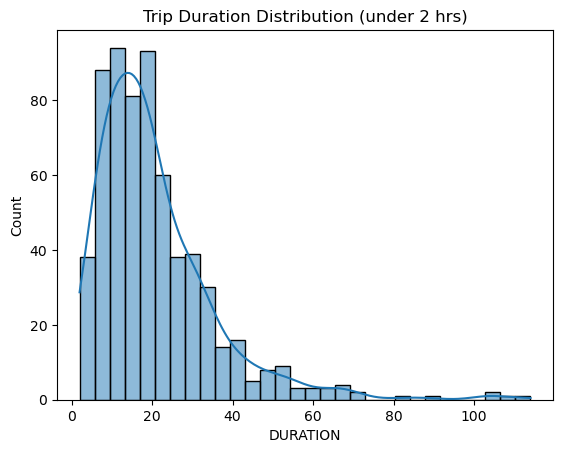

In [ ]:
# Trip Duration Analysis. If you have start and end timestamps, calculate duration.
# Insight: Detect unusually long or short trips (anomaly detection candidate).
data['DURATION'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 60  # in minutes
sns.histplot(data[data['DURATION'] < 120]['DURATION'], bins=30, kde=True)
plt.title("Trip Duration Distribution (under 2 hrs)")

Text(0.5, 1.0, 'Miles Distribution by Trip Purpose')

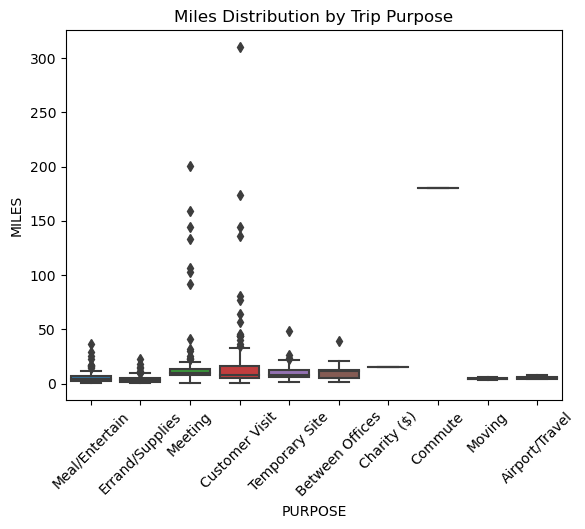

In [ ]:
# Miles vs. Purpose Boxplot.
# Insight: Shows variability and outliers per trip category.
sns.boxplot(data=data, x='PURPOSE', y='MILES')
plt.xticks(rotation=45)
plt.title('Miles Distribution by Trip Purpose')

Text(0.5, 1.0, 'Trip Heatmap: Hour of Day vs. Weekday')

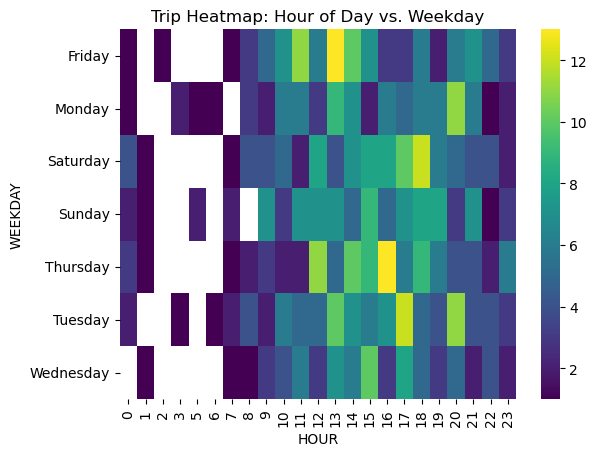

In [ ]:
# Heatmap of Hour vs Day.
# Insight: Identify peak hours on different days — useful for resource planning.
pivot = data.pivot_table(index='WEEKDAY', columns='HOUR', values='PURPOSE', aggfunc='count')
sns.heatmap(pivot, cmap='viridis')
plt.title("Trip Heatmap: Hour of Day vs. Weekday")

Text(0.5, 1.0, 'Cumulative Miles Over Time')

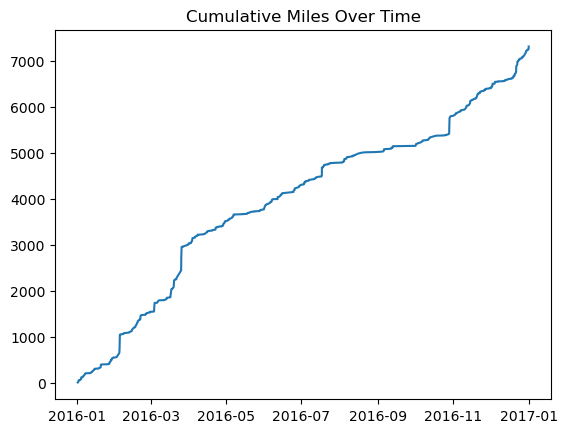

In [ ]:
# Cumulative Miles Over Time.
# Insight: Shows overall usage growth.
data_sorted = data.sort_values('START_DATE')
data_sorted['CUM_MILES'] = data_sorted['MILES'].cumsum()
plt.plot(data_sorted['START_DATE'], data_sorted['CUM_MILES'])
plt.title("Cumulative Miles Over Time")

c:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


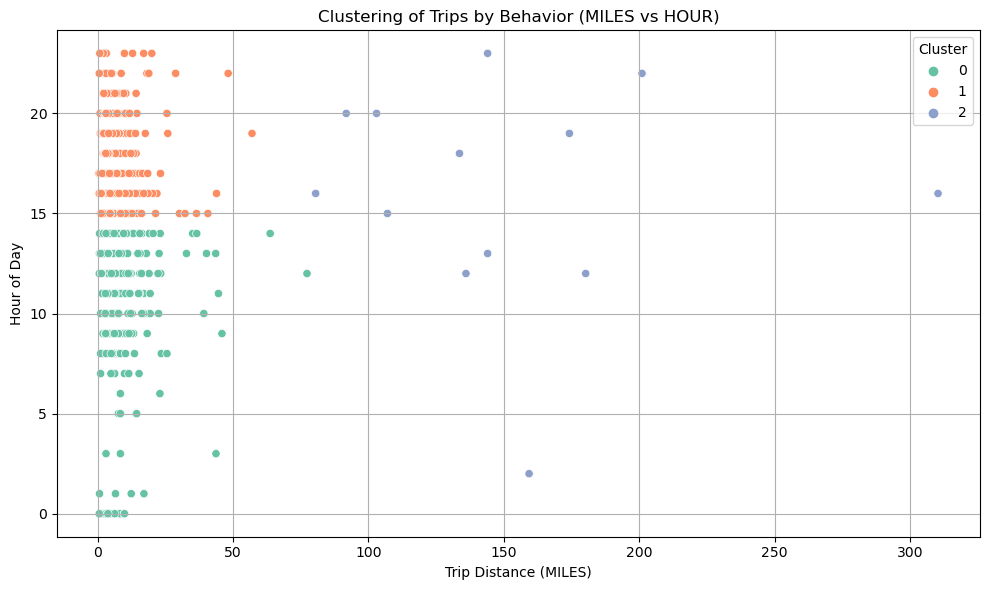

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Drop missing values for relevant columns
data_cluster = data[['MILES', 'HOUR']].dropna()

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cluster)

# Step 3: Apply KMeans (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
data_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cluster, x='MILES', y='HOUR', hue='Cluster', palette='Set2')
plt.title("Clustering of Trips by Behavior (MILES vs HOUR)")
plt.xlabel("Trip Distance (MILES)")
plt.ylabel("Hour of Day")
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.366412213740458

Classification Report:
                  precision    recall  f1-score   support

 Airport/Travel       0.00      0.00      0.00         0
Between Offices       0.00      0.00      0.00         4
 Customer Visit       0.19      0.25      0.21        20
Errand/Supplies       0.52      0.46      0.49        26
 Meal/Entertain       0.30      0.22      0.25        32
        Meeting       0.51      0.61      0.55        38
         Moving       0.00      0.00      0.00         1
 Temporary Site       0.14      0.10      0.12        10

       accuracy                           0.37       131
      macro avg       0.21      0.20      0.20       131
   weighted avg       0.37      0.37      0.36       131



c:\Users\91701\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91701\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91701\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

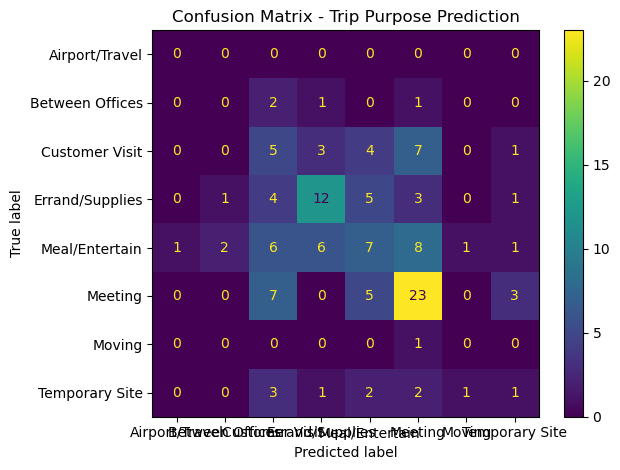

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Drop rows where 'PURPOSE' is NaN
data_clean = data.dropna(subset=['PURPOSE'])

# Step 2: Remove classes with less than 2 samples
valid_classes = data_clean['PURPOSE'].value_counts()
valid_classes = valid_classes[valid_classes >= 2].index
data_clean = data_clean[data_clean['PURPOSE'].isin(valid_classes)]

# Step 3: Define features and target
X = data_clean[['MILES', 'HOUR']]
y = data_clean['PURPOSE']

# Step 4: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='viridis')
plt.title("Confusion Matrix - Trip Purpose Prediction")
plt.tight_layout()
plt.show()

<Axes: xlabel='START_DATE', ylabel='MILES'>

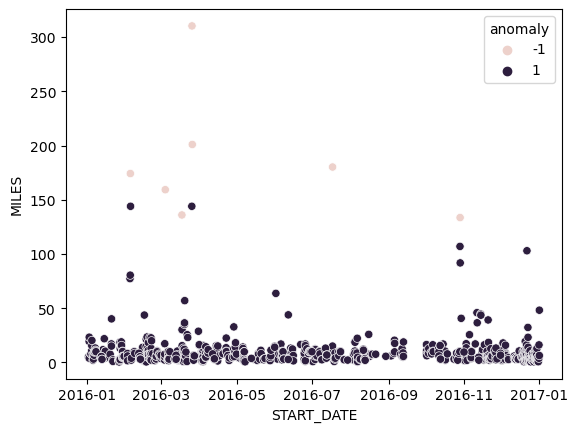

In [ ]:
# Anomaly Detection on Miles Using Isolation Forest.
# Insight: Spot unusually high/low trip distances.
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01)
data['anomaly'] = iso.fit_predict(data[['MILES']])
sns.scatterplot(data=data, x='START_DATE', y='MILES', hue='anomaly')